In [1]:
# 이 코드에서는 구문 분석을 수행한 후 시각화(ParseTree, WordCloud)하는 방법에 대해 알아봅니다. 
import re
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [2]:
from nltk import word_tokenize, pos_tag
from nltk.help import upenn_tagset # 품사 약자가 뭔지 알려줌. 

sentence = "the little yellow dog braked at the cat."
tagged = pos_tag(word_tokenize(sentence)) # 품사 분석
print(tagged)

[('the', 'DT'), ('little', 'JJ'), ('yellow', 'JJ'), ('dog', 'NN'), ('braked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('cat', 'NN'), ('.', '.')]


In [3]:
upenn_tagset("NN.*") # 품사 약자가 뭔지 알려줌. .*을 붙이면 NN으로 시작하는 모든 태그 설명 출력. 
upenn_tagset("JJ.*")
upenn_tagset("VP")

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth s

출력된 정보를 이용해서 규칙을 만든다.

In [ ]:
# 영어로 Parsetree 분석해보기
from nltk.chunk.regexp import RegexpParser

# DT+NN이거나 NN인 것들을 찾아야 함. 
rules = RegexpParser("NP: {<DT>?<JJ.*>*<NN.*>}") # '있을수도 있고 없을수도 있음'을 알려주는 정규식을 삽입.
parseTree = rules.parse(tagged)
parseTree.draw()
# parseTree

사용할 정규식 설명 : 
- 있거나 없거나 : ?
- 없거나 여러개 있거나 : *
- 1개 이상 있거나(1-n) : +

Rules : 
~~~
NP: {<DT>?<JJ.*>*<NN.*>}
NP: {<DT>?<NN.*>}
~~~


In [ ]:
# 한글로 Parsetree 분석해보기
from konlpy.tag import Kkma # 꼬마 모듈 임포트

sentence = "내 친구가 잠을 많이 잔다."
tagged = Kkma().pos(sentence)
tagged

[('내', 'NP'),
 ('친구', 'NNG'),
 ('가', 'JKS'),
 ('잠', 'NNG'),
 ('을', 'JKO'),
 ('많이', 'MAG'),
 ('자', 'VV'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

In [ ]:
Kkma().tagset # 태그셋 전부 출력해보기

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [ ]:
rules = RegexpParser("""
    NP: {<N.*>+<JK.*>}
    VP: {<MA.*>*<VV.*><EF.*>}
""")
parseTree = rules.parse(tagged) # 객체로 만들어두면 이터러블한 객체가 생성되며, 서브트리를 탐색할 수 있게 된다. 
rules.parse(tagged).pprint()
rules.parse(tagged).draw()

(S
  (NP 내/NP 친구/NNG 가/JKS)
  (NP 잠/NNG 을/JKO)
  (VP 많이/MAG 자/VV ㄴ다/EFN)
  ./SF)


Rules : 
~~~
NP: {<N.*>+<JK.*>} # 명사구 정의
VP: {<MA.*>*<VV.*><EF.*>} # 동사구 정의(종결형 어미로 끝나야 함.)
~~~


In [ ]:
for subtree in parseTree.subtrees(): # 위에있는것은 3개니까 trigram으로 생각해볼 수 있음. 
        if subtree.label() == "NP":
            print(subtree)

(NP 내/NP 친구/NNG 가/JKS)
(NP 잠/NNG 을/JKO)


In [ ]:
# 영어 문장으로 parsetree 뽑는 연습해보기
sentense1 = "I shot an elephant in my pajamas."
sentence2 = "The dog saw a man in the park."
sentence3 = "The angry bear chased the frightened little squirrel."
sentence4 = "The little bear saw the fine fat trout in the brook."

# pos_tag 분석
tagged1 = pos_tag(word_tokenize(sentense1)) # 품사 분석
tagged2 = pos_tag(word_tokenize(sentence2))
tagged3 = pos_tag(word_tokenize(sentence3))
tagged4 = pos_tag(word_tokenize(sentence4))
print(tagged3)
upenn_tagset("JJ.*")

# rules 패턴정의
rulesGeneral = RegexpParser('''
N: {<NN.*>}
V: {<VB.*>}
P: {<IN>}
Adj: {<JJ.*>}
Det: {<DT|PRP\$>}
Nom: {<Adj|Nom><N>}
Nom: {<Adj|Nom><Nom>}
NP: {<Det>?<N>$}
NP: {<Det>?<PRP|Nom>}
PP: {<P><NP>}
NP: {<Det>?<N><PP>}
NP: {<Det>?<N>}
VP: {<V><NP>}
VP: {<VP><NP>}
''')

# parseTree 정의
parseTree1 = rulesGeneral.parse(tagged4)
parseTree1.draw()
rules1.parse(tagged1).pprint()

사용할 정규식 설명 :

- 있거나 없거나 : ?
- 없거나 여러개 있거나 : *
- 1개 이상 있거나(1-n) : +

rule 정의하기
- 2, 4번같은경우 중의성 문제 때문에 NP를 올바른 위치에 정의하기 어렵다.(rulesGeneral은 1, 2, 3, 4번 모두에서 꽤 잘 작동하지만 세부 트리는 수정해 주어야 함.)
- bag-of-word는 맨 마지막 엘리먼트만으로 구성되기 때문에, NP와 같이 어느 단어가 누구를 수식하는지에 대한 지역 정보를 잃어버린다. 따라서 parsetree를 구축해야 의미를 제대로 전달할 수 있다. 


In [1]:
# 태그들의 빈도를 갖고 클라우드를 그려 시각화해주는 모듈
!pip install wordcloud 

In [219]:
from konlpy.corpus import kolaw
from konlpy.tag import Kkma # 꼬마 모듈(형태소분석기) 임포트
import os

# 경제, IT과학 분야 기사를 담기 위한 빈 객체 두개 생성
corpus_Eco = ""
corpus_ITSci = ""
txtfilespath = "./0314_DownloadedNewstxts" # 긁어왔던 기사가 저장되어 있는 폴더

for file in os.listdir("./0314_DownloadedNewstxts"):
    if file.endswith(".txt") and file.startswith("경제"): # '경제'로 시작하고 .txt로 끝나는 파일
        with open("./0314_DownloadedNewstxts/" + file, encoding = "utf-8") as f:
            corpus_Eco += f.read() # 읽어오는 내용들을 계속해서 추가

for file in os.listdir("./0314_DownloadedNewstxts"):
    if file.endswith(".txt") and file.startswith("IT과학"):
        with open("./0314_DownloadedNewstxts/" + file, encoding = "utf-8") as f:
            corpus_ITSci += f.read()

# corpus = kolaw.open(kolaw.fileids()[0]).read() # 법전 하나 읽어와서 corpus로 open하기
tokens = [_[0] for _ in Kkma().pos(corpus_Eco) # 형태소 분석
    if len(_[0]) > 1 and _[1].startswith("N")] # 어미에 해당하는 부분 없애기
tokens2 = [_[0] for _ in Kkma().pos(corpus_ITSci) # 형태소 분석
    if len(_[0]) > 1 and _[1].startswith("N")] # 어미에 해당하는 부분 없애기

In [220]:
from nltk import Text
textObj = Text(tokens)
textObj2 = Text(tokens2)

In [225]:
from wordcloud import WordCloud

Fontpath = "C:/windows/fonts/HMKMRHD.ttf" # 한글 깨짐 방지를 위해 폰트를 지정해주기
wc = WordCloud(font_path=Fontpath, max_words=30, background_color="white")

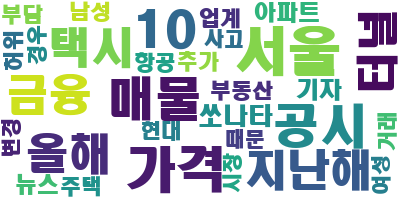

In [226]:
termList = textObj.vocab()
wc.generate_from_frequencies(termList)
wc.to_image() # 이미지로 출력. 글자만 넣어야 함!!(튜플 넣으면 안돌아감.)

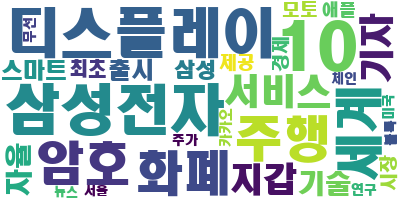

In [227]:
termList2 = textObj2.vocab()
wc.generate_from_frequencies(termList2)
wc.to_image() # 생활문화

In [228]:
"http://www.cs.virginia.edu/~hw5x/Course/IR2015/_site/lectures/" # 버지니아 공대 Information retrieval MOOC 강좌 링크

'http://www.cs.virginia.edu/~hw5x/Course/IR2015/_site/lectures/'